In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
import statsmodels.api as sm
from sklearn.svm import LinearSVC, SVC, SVR
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier,BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('~/dsi/Submissions/Projects/project-5-group-project-master/kiva_numeric_models.csv')

In [4]:
df.head(2)

,ORIGINAL_LANGUAGE,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,...,DISTRIBUTION_MODEL,word_count_DT,word_count_LU,word_count_tags,char_count_DT,char_count_LU,char_count_tags,FEM_COUNT,MALE_COUNT,month
0,Spanish,The city of Portoviejo is located in the valle...,1075.0,1,1,0,Natural Medicines,Health,to purchase natural products.,EC,...,field_partner,192,4,5,924,26,36,1,1,1
1,English,"Lorna is a married woman, 39 years old with fi...",400.0,0,1,0,Personal Products Sales,Retail,"to purchase additional stocks of Avon, Natasha...",PH,...,field_partner,75,12,3,371,69,28,1,1,3


In [5]:
df.shape

(344588, 23)

In [6]:
df.isnull().sum()

ORIGINAL_LANGUAGE         0
DESCRIPTION_TRANSLATED    0
LOAN_AMOUNT               0
STATUS                    0
IMAGE_ID                  0
VIDEO_ID                  0
ACTIVITY_NAME             0
SECTOR_NAME               0
LOAN_USE                  0
COUNTRY_CODE              0
LENDER_TERM               0
TAGS                      0
REPAYMENT_INTERVAL        0
DISTRIBUTION_MODEL        0
word_count_DT             0
word_count_LU             0
word_count_tags           0
char_count_DT             0
char_count_LU             0
char_count_tags           0
FEM_COUNT                 0
MALE_COUNT                0
month                     0
dtype: int64

In [26]:
df.dtypes

ORIGINAL_LANGUAGE          object
DESCRIPTION_TRANSLATED     object
LOAN_AMOUNT               float64
STATUS                      int64
IMAGE_ID                    int64
VIDEO_ID                    int64
ACTIVITY_NAME              object
SECTOR_NAME                object
LOAN_USE                   object
COUNTRY_CODE               object
LENDER_TERM               float64
TAGS                       object
REPAYMENT_INTERVAL         object
DISTRIBUTION_MODEL         object
word_count_DT               int64
word_count_LU               int64
word_count_tags             int64
char_count_DT               int64
char_count_LU               int64
char_count_tags             int64
FEM_COUNT                   int64
MALE_COUNT                  int64
month                       int64
dtype: object

In [3]:
## Seperating catigorical features

cato_features = [feature for feature in df.columns if df[feature].dtypes=='object']
cato_features

['ORIGINAL_LANGUAGE',
 'DESCRIPTION_TRANSLATED',
 'ACTIVITY_NAME',
 'SECTOR_NAME',
 'LOAN_USE',
 'COUNTRY_CODE',
 'TAGS',
 'REPAYMENT_INTERVAL',
 'DISTRIBUTION_MODEL']

In [4]:
## Seperating numerical features

num_features = [feature for feature in df.columns if df[feature].dtypes!='object']
num_features

['LOAN_AMOUNT',
 'STATUS',
 'IMAGE_ID',
 'VIDEO_ID',
 'LENDER_TERM',
 'word_count_DT',
 'word_count_LU',
 'word_count_tags',
 'char_count_DT',
 'char_count_LU',
 'char_count_tags',
 'FEM_COUNT',
 'MALE_COUNT',
 'month']

In [9]:
# Dummies for some of the catigorical

df_dummies = pd.get_dummies(df, columns=['month','ORIGINAL_LANGUAGE','ACTIVITY_NAME','COUNTRY_CODE','REPAYMENT_INTERVAL','SECTOR_NAME','DISTRIBUTION_MODEL'],drop_first=True)
df_dummies.head(2)

,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,LOAN_USE,LENDER_TERM,TAGS,word_count_DT,word_count_LU,...,SECTOR_NAME_Food,SECTOR_NAME_Health,SECTOR_NAME_Housing,SECTOR_NAME_Manufacturing,SECTOR_NAME_Personal Use,SECTOR_NAME_Retail,SECTOR_NAME_Services,SECTOR_NAME_Transportation,SECTOR_NAME_Wholesale,DISTRIBUTION_MODEL_field_partner
0,The city of Portoviejo is located in the valle...,1075.0,1,1,0,to purchase natural products.,6.0,"#Repeat Borrower, #Health and Sanitation",192,4,...,0,1,0,0,0,0,0,0,0,1
1,"Lorna is a married woman, 39 years old with fi...",400.0,0,1,0,"to purchase additional stocks of Avon, Natasha...",14.0,"#Woman-Owned Business, #Parent",75,12,...,0,0,0,0,0,1,0,0,0,1


In [32]:
df['ACTIVITY_NAME'].value_counts()

Farming                      41986
General Store                27200
Personal Housing Expenses    21719
Food Production/Sales        13892
Retail                       12806
                             ...  
Celebrations                    10
Bookbinding                      8
Patchwork                        6
Film                             4
Adult Care                       3
Name: ACTIVITY_NAME, Length: 163, dtype: int64

In [6]:
# Small sample of df with dummies columns=['month','ORIGINAL_LANGUAGE','ACTIVITY_NAME','COUNTRY_CODE','REPAYMENT_INTERVAL',
# 'SECTOR_NAME','DISTRIBUTION_MODEL']

df_dummies_small = df_dummies.sample(200_000)
df_dummies_small.shape

(200000, 291)

In [23]:
# Small sample of numerical values

df_num_small = df[num_features].sample(200_000)
df_num_small.shape

(200000, 14)

`Model 1`
---
`LogReg parameters: Default`

`Data: df_num_small (200,000)`

In [24]:
X = df_num_small.drop(columns = ['STATUS'])
y = df_num_small['STATUS']

In [25]:
logreg = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, stratify=y)
logreg.fit(X_train,y_train)
print(f'train acc score: {logreg.score(X_train,y_train)}\ntest acc score: {logreg.score(X_test,y_test)}')

train acc score: 0.8081266666666667
test acc score: 0.8088


/Users/crivera/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


`Model 2`
---
`LogReg parameters: solver='liblinear', max_iter=500`

`Data: df_dummies_small (200,000)`


In [ ]:
## Liblinear tends to work better with small datasets

In [38]:
X = df_dummies_small.drop(columns = ['STATUS','DESCRIPTION_TRANSLATED','TAGS','LOAN_USE'])
y = df_dummies_small['STATUS']

In [41]:
logreg = LogisticRegression(solver='liblinear', max_iter=500)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, stratify=y)
logreg.fit(X_train,y_train)
print(f'train acc score: {logreg.score(X_train,y_train)}\ntest acc score: {logreg.score(X_test,y_test)}')

train acc score: 0.8341266666666667
test acc score: 0.83406


`Model 3`
---
`Mutliple Regressors: All default parameters`

In [16]:
X = df_dummies_small.drop(columns = ['STATUS','DESCRIPTION_TRANSLATED','TAGS','LOAN_USE'])
y = df_dummies_small['STATUS']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42, stratify=y)

In [17]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
bdt = BaggingClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
svr = SVC()

In [18]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [19]:
reg = [
#         LogisticRegression(),
       KNeighborsClassifier(),
       DecisionTreeClassifier(),
#        BaggingClassifier(),
       RandomForestClassifier(),
       AdaBoostClassifier()
#        SVC()
]

In [20]:
def models(X_train,X_test,y_train,y_test,reg_list):   
    
    train_score=[]
    test_score=[]
    train_RMSE=[]
    test_RMSE=[]
    
    for reg in reg_list:
        
        reg.fit(X_train,y_train)
        train_score.append(reg.score(X_train,y_train))
        test_score.append(reg.score(X_test,y_test))
        train_pred = reg.predict(X_train)
        train_RMSE.append(mean_squared_error(y_train,train_pred))
        test_pred = reg.predict(X_test)
        test_RMSE.append(mean_squared_error(y_test,test_pred))
        
    return pd.DataFrame(data=[train_score, test_score, train_RMSE, test_RMSE],
                 index=['train_score', 'test_score','train_RMSE','test_RMSE'],
                 columns=[str(c) for c in reg_list]).T

In [21]:
models(X_train,X_test, y_train,y_test, reg)

,train_score,test_score,train_RMSE,test_RMSE
KNeighborsClassifier(),0.850020,0.78812,0.149980,0.21188
DecisionTreeClassifier(),0.999993,0.81466,0.000007,0.18534
RandomForestClassifier(),0.999987,0.86398,0.000013,0.13602
AdaBoostClassifier(),0.843253,0.84330,0.156747,0.15670


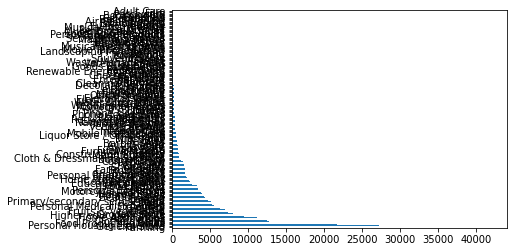

In [118]:
df['ACTIVITY_NAME'].value_counts().plot.barh();

In [40]:
print(df['ACTIVITY_NAME'].value_counts().std())
print(df['ACTIVITY_NAME'].value_counts().mean())
print(df['ACTIVITY_NAME'].value_counts().max())
print(df['ACTIVITY_NAME'].value_counts().min())

4884.134099292447
2114.036809815951
41986
3


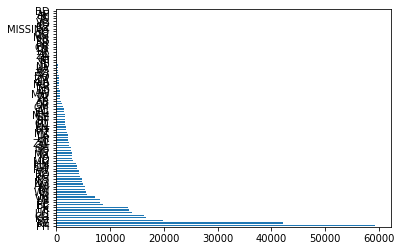

In [24]:
df['COUNTRY_CODE'].value_counts().plot.barh();

In [41]:
print(df['COUNTRY_CODE'].value_counts().std())
print(df['COUNTRY_CODE'].value_counts().mean())
print(df['COUNTRY_CODE'].value_counts().max())
print(df['COUNTRY_CODE'].value_counts().min())

8521.289265000243
4102.238095238095
59281
1


In [113]:
sum(df['COUNTRY_CODE'].value_counts()>=2000)

35

In [114]:
sum(df['ACTIVITY_NAME'].value_counts()>=2000)

37

In [7]:
cond = df['ACTIVITY_NAME'].value_counts()
threshold = 2000
df['ACTIVITY_NAME'] = np.where(df['ACTIVITY_NAME'].isin(cond.index[cond >= threshold ]), df['ACTIVITY_NAME'], 'misc_activity_name')

In [8]:
cond = df['COUNTRY_CODE'].value_counts()
threshold = 2000
df['COUNTRY_CODE'] = np.where(df['COUNTRY_CODE'].isin(cond.index[cond >= threshold ]), df['COUNTRY_CODE'], 'misc_country_code')

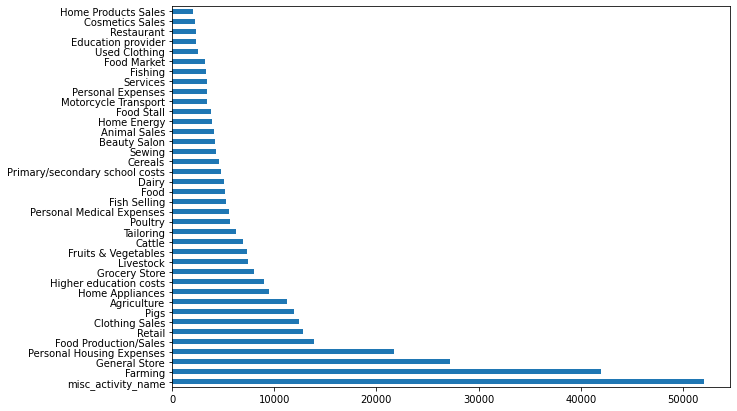

In [127]:
plt.figure(figsize = (10,7))
df['ACTIVITY_NAME'].value_counts().plot.barh();

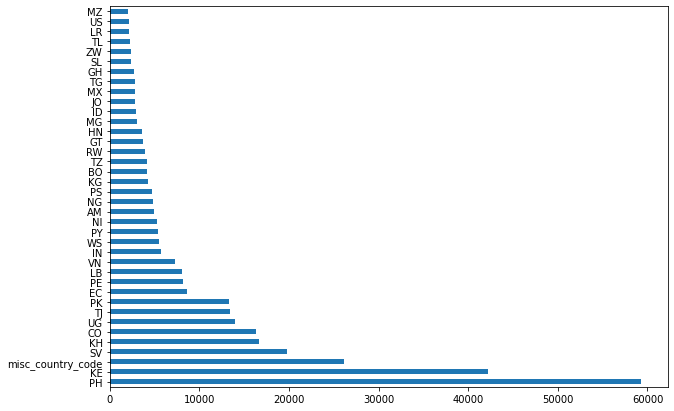

In [129]:
plt.figure(figsize = (10,7))
df['COUNTRY_CODE'].value_counts().plot.barh();

In [131]:
df.loc[df['ACTIVITY_NAME']=='misc_activity_name',:].head(2)

,ORIGINAL_LANGUAGE,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,...,DISTRIBUTION_MODEL,word_count_DT,word_count_LU,word_count_tags,char_count_DT,char_count_LU,char_count_tags,FEM_COUNT,MALE_COUNT,month
0,Spanish,The city of Portoviejo is located in the valle...,1075.0,1,1,0,misc_activity_name,Health,to purchase natural products.,EC,...,field_partner,192,4,5,924,26,36,1,1,1
1,English,"Lorna is a married woman, 39 years old with fi...",400.0,0,1,0,misc_activity_name,Retail,"to purchase additional stocks of Avon, Natasha...",PH,...,field_partner,75,12,3,371,69,28,1,1,3


In [132]:
df.loc[df['COUNTRY_CODE']=='misc_country_code',:].head(2)

,ORIGINAL_LANGUAGE,DESCRIPTION_TRANSLATED,LOAN_AMOUNT,STATUS,IMAGE_ID,VIDEO_ID,ACTIVITY_NAME,SECTOR_NAME,LOAN_USE,COUNTRY_CODE,...,DISTRIBUTION_MODEL,word_count_DT,word_count_LU,word_count_tags,char_count_DT,char_count_LU,char_count_tags,FEM_COUNT,MALE_COUNT,month
36,English,"Laila is 39, married, and has four children. H...",575.0,1,1,0,Cattle,Agriculture,to buy a head of cattle,misc_country_code,...,field_partner,72,6,8,322,18,68,1,1,2
70,English,"Esmat is 23, married and has a child. His wife...",625.0,1,1,0,Cattle,Agriculture,to buy a head of cattle to develop his busines...,misc_country_code,...,field_partner,97,23,7,426,97,76,0,1,9
